Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics


In [10]:
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t')


In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

Get the value counts

---
 we recognize that our labeled data is not balanced the number of ham data is much bigger than spam values,so it will effect on the acuuracy percentage


In [12]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
df['length'].describe() #get the mathimatical attrebutes


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

**Create plot show the length of ham & spam

---





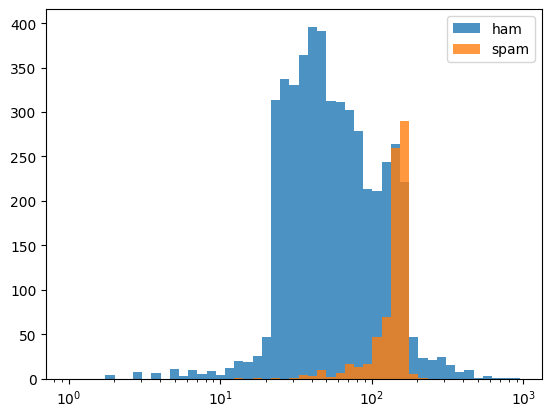

In [14]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

split data into x,y

In [17]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Training labels count:\n", y_train.value_counts())
print("\nTesting labels count:\n", y_test.value_counts())


Training labels count:
 label
ham     3232
spam     501
Name: count, dtype: int64

Testing labels count:
 label
ham     1593
spam     246
Name: count, dtype: int64


In [18]:
y_train.value_counts()

label
ham     3232
spam     501
Name: count, dtype: int64

In [21]:
y_test.value_counts()

label
ham     1593
spam     246
Name: count, dtype: int64

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

In [26]:
clf=LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [22]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])


text_clf.fit(X_train, y_train)


predictions = text_clf.predict(X_test)

In [24]:

print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [26]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [28]:
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


<Axes: >

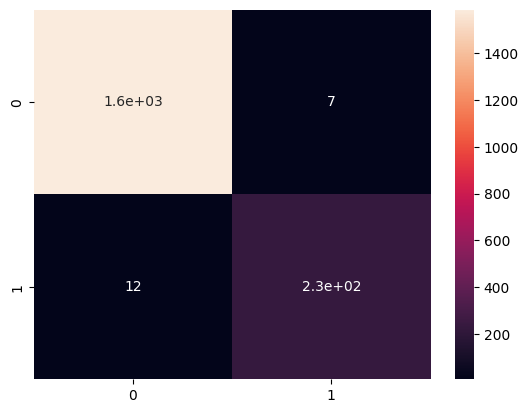

In [29]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test,predictions), annot=True)

In [30]:
text_clf.predict(['Hi How are you ? '])[0]

'ham'

In [31]:
text_clf.predict(['Congratulations , you won @ rolex '])[0]

'spam'

### ***THANKS***



